# Vprašanja

### 1) Uporaba self-a

In [1]:
class Animal:
    def __init__(self, animal_type, height, speed):
        self.animal_type = animal_type
        self.height = height
        self.speed = speed
        
    def hitrost_km_h(self):
        return self.speed * 3,14


In [2]:
animal1 = Animal('sesalec', 123, 45)

In [3]:
animal1.animal_type

'sesalec'

In [4]:
animal1.hitrost_km_h()

(135, 14)

In [5]:
animal2 = Animal('riba', 545, 95)

In [7]:
animal2.animal_type

'riba'

In [8]:
animal2.hitrost_km_h()

(285, 14)

### Predlagam še kak primer na temo list comprehension z razširjeno sintakso if/else.


In [9]:
squares = []
for i in range(10):
    squares.append(i * i)

print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [11]:
squares = [i * i for i in range(10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [28]:
def izracun_davka(cena):
    cena_z_davkom = cena * 1.22
    return round(cena_z_davkom, 2)

In [25]:
nova_cena = izracun_davka(10)
print(nova_cena)

12.2


#### Filtriranje (vrednost odstranimo)

    new_list = [expression for member in iterable (if conditional)]

In [29]:
cene = [1.09, 23.56, 57.84, 4.56, 6.78]
konce_cene = [izracun_davka(cena) for cena in cene if cena > 3]
print(konce_cene)

[28.74, 70.56, 5.56, 8.27]


#### Pogojno spremenimo vse vrednosti (vrednosti ostanejo)

    new_list = [expression (if conditional) for member in iterable]

In [32]:
konce_cene = [izracun_davka(cena) if cena > 3 else cena for cena in cene]
print(konce_cene)

[1.09, 28.74, 70.56, 5.56, 8.27]


### Praktična naloga parsanja IPjev

In [37]:
def read_ips(file_name):
    with open(file_name, 'rt') as ip_file:
        ips = ip_file.readlines()
    ips = [ip.strip() for ip in ips]
    return ips

In [38]:
ips = read_ips('ips.txt')
ips_lower_20 = [ip for ip in ips if int(ip.split('.')[0]) <= 20]
print(ips_lower_20)

['9.73.60.221', '14.95.158.181', '14.29.2.76', '15.224.36.13', '13.76.19.129', '19.94.81.41', '16.223.150.176', '7.21.170.24']


## Generatorji

#### Branje velikih filov

In [40]:
def gen_file_reader(file_name):
    with open(file_name, 'rt') as file:
        for row in file:
            yield row

In [41]:
gen_file = gen_file_reader('ips.txt')

In [43]:
next(gen_file)

'150.133.170.9\n'

In [44]:
next(gen_file)

'9.73.60.221\n'

In [45]:
gen_file = gen_file_reader('ips.txt')

total_lines = 0
for _ in gen_file:
    total_lines += 1
print(total_lines)    

100


#### Generiranje neskončnih zaporedji

In [47]:
def naskoncno_zaporedje():
    num = 0
    while True:
        yield num 
        num += 1

In [48]:
nesk_zap = naskoncno_zaporedje()

In [50]:
next(nesk_zap)

0

In [51]:
next(nesk_zap)

1

In [52]:
next(nesk_zap)

2

### Novi iteracijski postopki

In [58]:
a = list(range(3, 34, 3))
print(a)

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33]


In [59]:
def frange(start, stop, increment):
    x = start
    while x < stop:
        yield x
        x+= increment

In [61]:
a = list(frange(3, 10, 0.5))
print(a)

[3, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]


### Generator za naključna števila

In [63]:
import random

def gen_rand_number(seed=None):
    if seed:
        random.seed(seed)
    while True:
        num = random.random()
        yield num 

In [75]:
nak_zap = gen_rand_number()

abc = [next(nak_zap) for _ in range(10)]

In [81]:
abc.index(max(abc))

1

In [83]:
import numpy as np

In [87]:
abc_np = np.array(abc)

In [88]:
abc_np.argmax()

1

###  Kdaj in kako je najbolj smiselno uporabljati lambda funkcije?


    map, filter, reduce

In [91]:
podatki = [('abcd', 121),('erre', 231),('re', 148), ('kkrr',221)]

In [92]:
sorted(podatki)

[('abcd', 121), ('erre', 231), ('kkrr', 221), ('re', 148)]

In [94]:
def extract_second_index(t):
    return t[1]

In [96]:
sorted(podatki, key=extract_second_index)

[('abcd', 121), ('re', 148), ('kkrr', 221), ('erre', 231)]

In [97]:
sorted(podatki, key=lambda t: t[1])

[('abcd', 121), ('re', 148), ('kkrr', 221), ('erre', 231)]

### Katera knjižnica se uporablja za obdelavo števičnih podatkov z npr. več kot 100 000 vrstic (excel oz. txt datoteka) in izrise?

https://pandas.pydata.org/

https://github.com/codeforamerica/ohana-api/blob/master/data/sample-csv/phones.csv

In [98]:
import pandas as pd

In [99]:
phones = pd.read_csv('phones.csv')

In [101]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               54 non-null     int64  
 1   contact_id       6 non-null      float64
 2   location_id      44 non-null     float64
 3   organization_id  1 non-null      float64
 4   service_id       3 non-null      float64
 5   country_prefix   2 non-null      float64
 6   department       17 non-null     object 
 7   extension        11 non-null     float64
 8   number           54 non-null     object 
 9   number_type      54 non-null     object 
 10  vanity_number    2 non-null      object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.8+ KB


In [102]:
phones.describe()

,id,contact_id,location_id,organization_id,service_id,country_prefix,extension
count,54.000000,6.000000,44.000000,1.0,3.0,2.0,11.000000
mean,28.944444,31.166667,11.681818,8.0,22.0,1.0,1471.000000
std,17.413307,2.786874,6.600820,NaN,0.0,0.0,1884.895116
min,1.000000,29.000000,1.000000,8.0,22.0,1.0,101.000000
25%,14.250000,29.000000,6.000000,8.0,22.0,1.0,123.000000
50%,28.500000,30.500000,11.500000,8.0,22.0,1.0,202.000000
75%,41.750000,32.000000,17.000000,8.0,22.0,1.0,2661.500000
max,60.000000,36.000000,22.000000,8.0,22.0,1.0,4500.000000


In [103]:
phones.head(10)

,id,contact_id,location_id,organization_id,service_id,country_prefix,department,extension,number,number_type,vanity_number
0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,650 780-7525,voice,NaN
1,2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,650 701-0856,fax,NaN
2,3,NaN,2.0,NaN,NaN,NaN,NaN,4385.0,650 403-4300,voice,NaN
3,4,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650 403-4302,fax,NaN
4,5,NaN,3.0,NaN,NaN,NaN,English,NaN,650 403-4300,voice,NaN
5,6,NaN,3.0,NaN,NaN,NaN,NaN,NaN,650 403-4303,fax,NaN
6,7,NaN,4.0,NaN,NaN,NaN,NaN,4500.0,650 403-4300,voice,NaN
7,8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,650 403-4303,fax,NaN
8,9,NaN,5.0,NaN,NaN,NaN,NaN,4100.0,650 403-4300,voice,NaN
9,10,NaN,5.0,NaN,NaN,NaN,NaN,NaN,650 403-4303,fax,NaN


In [106]:
phones[phones["extension"].notnull()]["extension"].sum()

16181.0

In [109]:
phones["number_type"].value_counts()

voice      26
fax        24
sms         2
hotline     1
tty         1
Name: number_type, dtype: int64

In [114]:
wxt =phones[phones["extension"].notnull()]["extension"]

<AxesSubplot:>

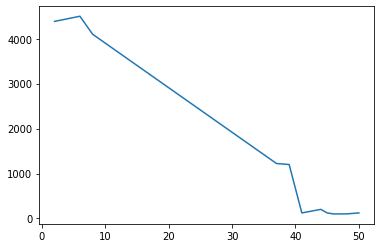

In [115]:
wxt.plot()

In [120]:
phones["number"].str.replace("-", " ").str.replace(" ", "").astype('int')

0     6507807525
1     6507010856
2     6504034300
3     6504034302
4     6504034300
5     6504034303
6     6504034300
7     6504034303
8     6504034300
9     6504034303
10    6503262025
11    6503269547
12    6503220126
13    6503224067
14    6503232022
15    6503269547
16    6507807261
17    6505693371
18    6507807018
19    6507807069
20    6507807010
21    6507807077
22    6507807004
23    6507805740
24    6503684643
25    6503641712
26    4156438000
27    4152851391
28    4087200420
29    4087208075
30    6502664591
31    6502662594
32    6502664594
33    6508391447
34    6508391457
35    6505780400
36    6505780440
37    7035551212
38    2025551212
39    1234567890
40    2025551212
41    6503726200
42    6506278244
43    8003726200
44    6503726200
45    7035551212
46    1234567890
47    7034441234
48    6505551212
49    6503653738
50    1234567890
51    7894561230
52    6502225555
53    6505551212
Name: number, dtype: int64